In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./ml_source_files/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# creditcard 부정거래 탐지..

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.drop('Time', axis=1, inplace=True)

In [ ]:
# x data, y data divide

In [10]:
y = df.Class
x = df.drop('Class', axis=1)

In [11]:
# train data, test data split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, \
                                                    random_state=111)

In [ ]:
# logisticregression으로 학습시키기..

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

In [15]:
# algoritym train

In [16]:
lr.fit(x_train, y_train)

LogisticRegression()

In [17]:
# classification 예측, 평가.. : classification_report, auc값..

In [18]:
preds = lr.predict(x_test)

In [26]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import classification_report, roc_auc_score

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.84      0.65      0.74       153

    accuracy                           1.00     85443
   macro avg       0.92      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [24]:
lr.predict_proba(x_test)[:,1]

array([2.67882518e-03, 2.96872428e-04, 1.15100235e-04, ...,
       9.47471082e-05, 1.54390106e-03, 3.47146229e-04])

In [25]:
roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])

0.9693729275819445

In [27]:
# LGBMClassifier를 통한 예측... 평가..  

In [28]:
from lightgbm import LGBMClassifier

In [29]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

preds_lgbm = lgbm.predict(x_test)
preds_lgbm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
print(classification_report(y_test, preds_lgbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.33      0.72      0.45       153

    accuracy                           1.00     85443
   macro avg       0.67      0.86      0.73     85443
weighted avg       1.00      1.00      1.00     85443



In [35]:
lgbm.predict_proba(x_test)[:,1]

array([0.00000000e+000, 1.23655133e-143, 1.15507019e-006, ...,
       1.35047689e-006, 6.38763981e-005, 3.92221780e-007])

In [36]:
roc_auc_score(y_test, lgbm.predict_proba(x_test)[:,1])

0.799150380439822

In [37]:
# randomforest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
preds_rfc = rfc.predict(x_test)

In [43]:
print(classification_report(y_test, preds_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.91      0.82      0.87       153

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [44]:
rfc.predict_proba(x_test)[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])

0.9662327376723935

In [47]:
# scaling (StandardScaler)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit(x_train)  

StandardScaler()

In [53]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [54]:
# scaling한 데이터를 기반으로 위의 세 모델을 생성하고 평가하시오..

In [58]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

In [59]:
log = LogisticRegression()
lgbm = LGBMClassifier()
rfc = RandomForestClassifier()

log.fit(x_train, y_train)
lgbm.fit(x_train, y_train)
rfc.fit(x_train, y_train)

log_pre = log.predict(x_test)
lgbm_pre = lgbm.predict(x_test)
rfc_pre = rfc.predict(x_test)

log_pro = log.predict_proba(x_test)
lgbm_pro = lgbm.predict_proba(x_test)
rfc_pro = rfc.predict_proba(x_test)

In [60]:
print('log_f1 :',f1_score(y_test, log_pre))
print('lgbm_f1 :', f1_score(y_test, lgbm_pre))
print('rfc_f1 :', f1_score(y_test, rfc_pre))

log_f1 : 0.7352941176470588
lgbm_f1 : 0.4545454545454546
rfc_f1 : 0.8749999999999999


In [61]:
print('log_auc_score :',roc_auc_score(y_test, log_pro[:,1]))
print('lgbm_auc_score :', roc_auc_score(y_test, lgbm_pro[:,1]))
print('rfc_auc_score :', roc_auc_score(y_test, rfc_pro[:,1]))

log_auc_score : 0.9693729275819445
lgbm_auc_score : 0.799150380439822
rfc_auc_score : 0.9663389113803962


In [62]:
log = LogisticRegression()
lgbm = LGBMClassifier()
rfc = RandomForestClassifier()

log.fit(x_train_scaled, y_train)
lgbm.fit(x_train_scaled, y_train)
rfc.fit(x_train_scaled, y_train)

log_pre = log.predict(x_test_scaled)
lgbm_pre = lgbm.predict(x_test_scaled)
rfc_pre = rfc.predict(x_test_scaled)

log_pro = log.predict_proba(x_test_scaled)
lgbm_pro = lgbm.predict_proba(x_test_scaled)
rfc_pro = rfc.predict_proba(x_test_scaled)

In [63]:
print('log_f1 :',f1_score(y_test, log_pre))
print('lgbm_f1 :', f1_score(y_test, lgbm_pre))
print('rfc_f1 :', f1_score(y_test, rfc_pre))

log_f1 : 0.7364620938628158
lgbm_f1 : 0.40501043841336115
rfc_f1 : 0.8680555555555556


In [64]:
print('log_auc_score :',roc_auc_score(y_test, log_pro[:,1]))
print('lgbm_auc_score :', roc_auc_score(y_test, lgbm_pro[:,1]))
print('rfc_auc_score :', roc_auc_score(y_test, rfc_pro[:,1]))

log_auc_score : 0.9921590850746052
lgbm_auc_score : 0.7628881317642153
rfc_auc_score : 0.9725405517661007


In [65]:
# 이상치(outlier) 제거..

In [ ]:
# pd.DataFrame(x_train_scaled).plot(kind='bar')

<AxesSubplot:>

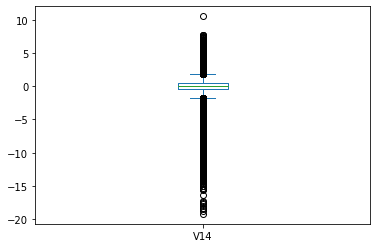

In [70]:
df['V14'].plot(kind='box')

In [75]:
qu25 = np.percentile(df['V14'].values, 25)
qu75 = np.percentile(df['V14'].values, 75)
iqr = qu75 - qu25
iqr

0.9187238616731425

In [76]:
low_limit = qu25 - iqr*1.5
high_limit = qu75 + iqr*1.5

In [80]:
df1 = df[(df['V14'] >= low_limit) & (df['V14'] <= high_limit)]

In [85]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [87]:
# (x_train_scaled['V14'] >= low_limit) \
#                                    & (x_train_scaled['V14'] <= high_limit)

(x_train_scaled[:, 13] >= low_limit) \
                                   & (x_train_scaled[:,13] <= high_limit)

array([False,  True,  True, ...,  True,  True,  True])

In [88]:
x_train_scaled_no = x_train_scaled[(x_train_scaled[:, 13] >= low_limit) \
                                   & (x_train_scaled[:,13] <= high_limit)]

y_train_no = y_train[(x_train_scaled[:, 13] >= low_limit) \
                                   & (x_train_scaled[:,13] <= high_limit)]

In [90]:
# 세 모델 평가.. f1_score, roc_auc_score를 계산..

In [92]:
log = LogisticRegression()
lgbm = LGBMClassifier()
rfc = RandomForestClassifier()

models = [log, lgbm, rfc]

for m in models:
    m.fit(x_train_scaled_no, y_train_no)
    preds = m.predict(x_test_scaled)
    proba = m.predict_proba(x_test_scaled)
    
    print(m.__class__.__name__)
    print('f1_score :', f1_score(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba[:,1]))
    print('---------------------------------')


LogisticRegression
f1_score : 0.7705882352941177
roc_auc_score : 0.993446350283577
---------------------------------
LGBMClassifier
f1_score : 0.0
roc_auc_score : 0.4073729996160733
---------------------------------
RandomForestClassifier
f1_score : 0.5943775100401607
roc_auc_score : 0.9622919343998981
---------------------------------


In [97]:
# imbalanced dataset : smote

In [98]:
y_train_no.value_counts()

0    188157
1        49
Name: Class, dtype: int64

In [99]:
y_test.value_counts()

0    85290
1      153
Name: Class, dtype: int64

In [ ]:
# !pip install -U imbalanced-learn

In [100]:
import imblearn

In [101]:
from imblearn.over_sampling import SMOTE

In [102]:
smote = SMOTE(random_state=111)
x_train_sm, y_train_sm = smote.fit_resample(x_train_scaled_no, y_train_no)

In [103]:
y_train_sm.value_counts()

0    188157
1    188157
Name: Class, dtype: int64

In [104]:
log = LogisticRegression()
lgbm = LGBMClassifier()
rfc = RandomForestClassifier()

models = [log, lgbm, rfc]

for m in models:
    m.fit(x_train_sm, y_train_sm)
    preds = m.predict(x_test_scaled)
    proba = m.predict_proba(x_test_scaled)
    
    print(m.__class__.__name__)
    print('f1_score :', f1_score(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba[:,1]))
    print('---------------------------------')

LogisticRegression
f1_score : 0.02478050381554115
roc_auc_score : 0.9915510863742848
---------------------------------
LGBMClassifier
f1_score : 0.4710920770877944
roc_auc_score : 0.9802457896434846
---------------------------------
RandomForestClassifier
f1_score : 0.07453416149068323
roc_auc_score : 0.9830880724510074
---------------------------------
